# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


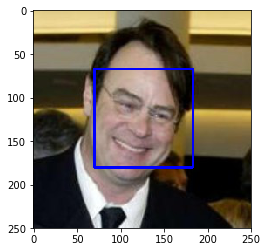

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    # Read the image
    img = cv2.imread(img_path)
    # Transform to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect face
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
* The percent of human faces detected in the humans files were 98.0%.
* The percent of human faces detected in the dog files were 17.0%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
# Create array to store results
human=np.zeros((100,1))
dog=np.zeros((100,1))
# iterate over the list
for x in range(len(human_files_short)):
    human[x]=face_detector(human_files_short[x])
    dog[x]=face_detector(dog_files_short[x])
# Results
print('The percent of human faces detected in the humans files were {}%'.format(sum(human)[0]))
print('The percent of human faces detected in the dog files were {}%'.format(sum(dog)[0]))

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

The percent of human faces detected in the humans files were 98.0%
The percent of human faces detected in the dog files were 17.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### For this section, I am going to use a "Multi-Task Cascaded Convolutional Neural Networks"
### See https://arxiv.org/abs/1604.02878 for details
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
# I can run this on this platform but it is an alternative using deep learning
'''
from mtcnn.mtcnn import MTCNN
def face_detector_dl(img_path):
    # Read the image
    img = cv2.imread(img_path)
    # Transform to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect face
    faces = face_detector.detect_faces(gray)
    return len(faces) > 0
# Now the same code than before --------------------
# Create a face detector
face_detector = MTCNN()
# Create array to store results
human=np.zeros((100,1))
dog=np.zeros((100,1))
# iterate over the list
for x in range(len(human_files_short)):
    human[x]=face_detector_dl(human_files_short[x])
    dog[x]=face_detector_dl(dog_files_short[x])
# Results
print('The percent of human faces detected in the humans files were {}%'.format(sum(human)[0]))
print('The percent of human faces detected in the dog files were {}%'.format(sum(dog)[0]))
'''

"\nfrom mtcnn.mtcnn import MTCNN\ndef face_detector_dl(img_path):\n    # Read the image\n    img = cv2.imread(img_path)\n    # Transform to grayscale\n    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n    # Detect face\n    faces = face_detector.detect_faces(gray)\n    return len(faces) > 0\n# Now the same code than before --------------------\n# Create a face detector\nface_detector = MTCNN()\n# Create array to store results\nhuman=np.zeros((100,1))\ndog=np.zeros((100,1))\n# iterate over the list\nfor x in range(len(human_files_short)):\n    human[x]=face_detector_dl(human_files_short[x])\n    dog[x]=face_detector_dl(dog_files_short[x])\n# Results\nprint('The percent of human faces detected in the humans files were {}%'.format(sum(human)[0]))\nprint('The percent of human faces detected in the dog files were {}%'.format(sum(dog)[0]))\n"

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:06<00:00, 87652277.78it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

def DNN_predict(img_path,model):
    '''
    Use pre-trained model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    Note: I modified a little bid this function to input also the model 
          (this is more efficient and generalizable)
    Args:
        img_path: path to an image
        model: pre-trained model to predict the class of the image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    # Load Image    
    image = Image.open(img_path)
    # Create a function to Transform to tensor and normalize
    transformation = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])
    # Transformation
    image_tensor = transformation(image).float()
    image_tensor = image_tensor.unsqueeze_(0)

    # Prediction
    prediction= model(image_tensor)
    # Argument (classe)
    classe = prediction.data.numpy().argmax()
    
    return classe # predicted class index
# Test the function with 
img_path=dog_files[2]
# Create a vgg16 model 
vgg16 = models.vgg16(pretrained=True)
DNN_predict(img_path,vgg16)

243

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path,model):
    ## TODO: Complete the function.
    # Use the net VGG16 to predict the category
    prediction = DNN_predict(img_path,model)
    
    return (prediction>=151) & (prediction<=268) # true/false
# Test the function with 
img_path=dog_files[2]
dog_detector(img_path,vgg16)

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
* The percent of dogs detected in the humans files were 0.0%.
* The percent of dogs detected in the dog files were 100.0%

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
# Create array to store results
human=np.zeros((100,1))
dog=np.zeros((100,1))
# iterate over the list
for x in range(len(human_files_short)):
    human[x]=dog_detector(human_files_short[x],vgg16)
    dog[x]=dog_detector(dog_files_short[x],vgg16)
# Results
print('The percent of dogs detected in the humans files were {}%'.format(sum(human)[0]))
print('The percent of dogs detected in the dog files were {}%'.format(sum(dog)[0]))

The percent of dogs detected in the humans files were 1.0%
The percent of dogs detected in the dog files were 100.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
## I am going to prove with another pretrained DNN
## (Aggregated Residual Transformations for Deep Neural Networks)
# Note that thanks to the change that I included in the above function, now 
# it's very easy to prove with differents NN.
alexnet = models.alexnet(pretrained=True)
# Create array to store results
human=np.zeros((100,1))
dog=np.zeros((100,1))
# iterate over the list
for x in range(len(human_files_short)):
    human[x]=dog_detector(human_files_short[x],alexnet)
    dog[x]=dog_detector(dog_files_short[x],alexnet)
# Results
print('The percent of dogs detected with Alexnet in the humans files were {}%'.format(sum(human)[0]))
print('The percent of dogs detected with Alexnet in the dog files were {}%'.format(sum(dog)[0]))

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.torch/models/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:02<00:00, 95000857.08it/s]


The percent of dogs detected with Alexnet in the humans files were 2.0%
The percent of dogs detected with Alexnet in the dog files were 99.0%


Well, isn't bad but is better to use "vgg16" as sugested!

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# TODO: Define transforms for the training data and testing data
# In all the cases the transformations consist in: resize to 255, 
# crop using 244 pixels, create a tensor object and normalize 
# In the case of the training data I included a random rotation 
# to provide variability to the training and more generalization power to the NN.
train_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(244),
                                      transforms.RandomRotation(30),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])
# Validation and testing transformation
val_test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(244),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])
# Transform the data
train_data = datasets.ImageFolder('/data/dog_images' + '/train', transform=train_transforms)
valid_data = datasets.ImageFolder('/data/dog_images' + '/valid', transform=val_test_transforms)
test_data = datasets.ImageFolder('/data/dog_images' + '/test', transform=val_test_transforms)
# Create the data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)
# Create a dictionary to storage all the loaders
loaders_scratch={'train': trainloader, 'valid': validloader, 'test': testloader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:       
* First, I resized all images to 255 using bilinear interpolation. This interpolation creates a continuous transition between color values. In my opinion, the size selection (255) is accurate because our dataset is composed by common images that people take diary, which typically have this kind of size. In other cases, for example, in microscopy, it's usual to generate images of 512x512, but this is not our case. Next, the images were crop to 244, note that this action was taken because normally people keep attention in the center of the image, so, the information in the center of the images should be more relevant to the classification algorithm.
* The input tensor will have a size of [64,3,244,244]. Note that our images have 3 channels with a size 244 x 244, also, I selected a batch size of 64 (64 training examples to be used in each iteration). This batch size is set mostly empirically, but some studies have shown that large batch size conducts to a degradation of the model, and small ones creates underfitting models. In my opinion, a batch size of 64 is a good starting point for this case where you have a lot of training images.
* I decided to augment the dataset generating random rotations of the images between 0 and 30 degrees. This kind fo alternative pushes the NN to learn more intrinsic patterns and deal with noise scenarios, which at the end, increase its prediction capabilities.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # Input 3 channels and output 64 channels (the convolutin operation is going to
        # reduce he 3 channels of 244x244 image to 64 channels of 123x123)
        self.conv_0 = nn.Conv2d(3,64,kernel_size=(6,6),stride=(2,2),padding=(3,3),bias=True)
        # Normalize the values
        self.normalization_0 = nn.BatchNorm2d(64,eps=0.000001,momentum=0.1)
        # Pool operation (This is going to take the 64 images of 123x123 and transformed it
        # to 64 images of 62x62)
        self.pool_0 = nn.MaxPool2d(kernel_size=3,stride=2,padding=1)
        # Convolution the 64 images to 128. This is going to generate 128 images of
        # 31x31
        self.conv_1 = nn.Conv2d(64,128,kernel_size=(4,4),stride=(2,2),padding=1)    
        # Normalize
        self.normalization_1 = nn.BatchNorm2d(128,eps=0.000001,momentum=0.1,affine=True)
        # Pool operation. We are going to obtain 128 images of 8x8
        self.pool_1 = nn.MaxPool2d(kernel_size=5,stride=4,padding=1)
        
        # Now we can convert the elements to a vector of 128x8x8=32768 units for the 
        # total connected neural networks
        self.classifier_input = nn.Linear(in_features=8192,out_features=1000,bias=True)
        self.classifier_hidden1 = nn.Linear(in_features=1000,out_features=500,bias=True)
        self.classifier_hidden2 = nn.Linear(in_features=500,out_features=200,bias=True)
        self.output = nn.Linear(in_features=200,out_features=133,bias=True)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = self.conv_0(x)
        x = F.relu(self.normalization_0(x))
        x = self.pool_0(x)
        x = self.conv_1(x)
        x = F.relu(self.normalization_1(x))
        x = self.pool_1(x)
        # Reshape data to inpuut to the input layer
        x = x.view(-1, 128*8*8)
        # 
        x = F.relu(self.classifier_input(x))
        x = F.relu(self.classifier_hidden1(x))
        x = F.relu(self.classifier_hidden2(x))
        x = F.log_softmax(self.output(x),dim=1)
        
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
model_scratch

Net(
  (conv_0): Conv2d(3, 64, kernel_size=(6, 6), stride=(2, 2), padding=(3, 3))
  (normalization_0): BatchNorm2d(64, eps=1e-06, momentum=0.1, affine=True, track_running_stats=True)
  (pool_0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv_1): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (normalization_1): BatchNorm2d(128, eps=1e-06, momentum=0.1, affine=True, track_running_stats=True)
  (pool_1): MaxPool2d(kernel_size=5, stride=4, padding=1, dilation=1, ceil_mode=False)
  (classifier_input): Linear(in_features=8192, out_features=1000, bias=True)
  (classifier_hidden1): Linear(in_features=1000, out_features=500, bias=True)
  (classifier_hidden2): Linear(in_features=500, out_features=200, bias=True)
  (output): Linear(in_features=200, out_features=133, bias=True)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
The architecture of this model is composed by two main pieces:
1. **Features Extraction:**
    * The images to feed the neural networks have a size of $3 \times 224 \times 224$, so the first logical step is to convolve the images to generate a characteristic space. For this, I went from the 3 original channels to 64 using a kernel size of $6\times 6$ with stride 2 and padding 3. This convolution layer generated a layer with 64 characteristics with size $123\times 123$ that was normalized using Bach Normalization.
    * Next, I included a Pooling Layer (size 3x3 with stride 2 and padding 1) with the objective of reducing the parametric space and provide the layer with more generalization power. This strategy generates a layer with 64 channels and characteristics with dimension $64\times 64$.
    * The next step is a convolution that generate 128 channels from 64 with a kernel zise of 4, stride 2 and padding 1. Note that with this operation we are reducing the dimensionality of the characteristics to $31\times 31$. As before, I include a normalization  operation after the convolution.
    * Finally, the feature extraction stage finishes with a pooling operation. For this, I used Max Pool with kernel size 5, stride 4, and padding 1. This is extreme and I know it, but at this point, I don't have a lot of time or computational resources to spend in a model that is not going to obtain a good accuracy because it is too simple for the complexity of this problem.
2. **Classifier:** This is a fully connected NN with the following structure.
    * One linear layer with an input of 8192 units and 1000 output neurons and a bias unit. Activation function Rectified Linear Unit (ReLU).
    * A second linear layer with an input of 1000 units and 500 output neurons and a bias unit. Activation function Rectified Linear Unit (ReLU).
    * Another hidden layer with an input of 500 units and 200 output neurons and a bias unit. Activation function Rectified Linear Unit (ReLU).
    * A final output layer with an input of 200 neurons and an output of 133 (number of classes). In this case, I used a Log Softmax function to compute the logarithm of the probability.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [14]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            log_ps = model(data)
            
            loss = criterion(log_ps, target)
            loss.backward()
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            
        ######################    
        # validate the model #
        ######################
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                # Prediction
                log_prediction=model(data)
                # Compute the probability
                ps = torch.exp(log_prediction)
                # 
                top_p, top_class = ps.topk(1, dim=1)
                # 
                this_loss = criterion(top_class, target).item()
                ## update the average validation loss
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (this_loss - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
    ## TODO: save the model if validation loss has decreased
    # torch.save(model.state_dict(), save_path)
        
    # return trained model
    return model


# train the model (the model is already trained and saved, I commented this line to avoid loss time)
#model_scratch = train(15, loaders_scratch, model_scratch, optimizer_scratch, 
#                      criterion_scratch, use_cuda, 'model_scratch.pt')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        ps_output=torch.exp(output)
        pred = ps_output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
# I included the next piece of code to avoid errors
if torch.cuda.is_available():
    map_location=lambda storage, loc: storage.cuda()
else:
    map_location='cpu'    

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt',map_location=map_location))
# call test function 
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.793828


Test Accuracy: 15% (129/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [16]:
## TODO: Specify data loaders
# In all the cases the transformations consist in: resize to 255, 
# crop using 244 pixels, create a tensor object and normalize 
# In the case of the training data I included a random rotation 
# to provide variability to the training and more generalization power to the NN.
train_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(244),
                                      transforms.RandomRotation(30),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])
# Validation and testing transformation
val_test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(244),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])
# Transform the data
train_data = datasets.ImageFolder('/data/dog_images' + '/train', transform=train_transforms)
valid_data = datasets.ImageFolder('/data/dog_images' + '/valid', transform=val_test_transforms)
test_data = datasets.ImageFolder('/data/dog_images' + '/test', transform=val_test_transforms)
# Create the data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)
# Create a dictionary to storage all the loaders
loaders_transfer={'train': trainloader, 'valid': validloader, 'test': testloader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [18]:
from collections import OrderedDict
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.densenet121(pretrained=True)
# The model is composed by two sections: 1. Convolutional Stage, 2. Classifier (full connected NN)
# I am going to keep the architecture and parameters in the first section and create a new 
# classifier in accordance with our project.
# Freeze parameters so we don't backprop through them
for param in model_transfer.parameters():
    param.requires_grad = False
# If you print the model (print(model_transfer)), you can see that the output of the convolution section
# contains 1024 nodes, so, this is the input of the out full conected NN.
model_transfer.classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(1024, 500)),
    ('relu', nn.ReLU()),
    ('fc2', nn.Linear(500, 133)),
    ('output', nn.LogSoftmax(dim=1))]))

if use_cuda:
    model_transfer = model_transfer.cuda()
model_transfer

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__     
* I used a [Dense Convolutional Network (DenseNet)](https://pytorch.org/hub/pytorch_vision_densenet/) for the transfer learning. These networks are composed by two stages, the first one is related with the features extraction while the second is the classifier, which is a full connected neural networks. In general, DenseNet have several advantages (see the [original paper](https://arxiv.org/pdf/1608.06993.pdf) for details) that makes them desirable for a lot of applications, for example, reduce the number of parameters (less memory and computational resources), alleviate the vanishing of the gradient and empower feature propagation.  
* In general, the network is composed by $121$ layers. The input layer expect scaled images (values between [0, 1]) with shape $3\times 224\times 224$ with a normalization given by $mean =[0.485,0.456,0.406]$ and $sd =[0.229, 0.224, 0.225]$.
* The original classifier in DenseNet is composed by a single fully connected layer with input of 1024 neurons and an output of 1000 units. I changed this architecture in a way that it comply with our problem specificities:
    * One linear layer with an input of 1024 units and 500 output neurons and a bias unit. Activation function Rectified Linear Unit (ReLU).
    * A final output layer with an input of 500 neurons and an output of 133 (number of classes). In this case, I used a Log Softmax function to compute the logarithm of the probability.       

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [19]:
criterion_transfer = nn.NLLLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(),lr=0.03)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [25]:
# train the model
#model_transfer = train(25, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.553665 	Validation Loss: 4.135879
Epoch: 2 	Training Loss: 3.418205 	Validation Loss: 2.815883
Epoch: 3 	Training Loss: 2.170602 	Validation Loss: 1.822265
Epoch: 4 	Training Loss: 1.469322 	Validation Loss: 1.360983
Epoch: 5 	Training Loss: 1.121332 	Validation Loss: 1.061042
Epoch: 6 	Training Loss: 0.918619 	Validation Loss: 0.911601
Epoch: 7 	Training Loss: 0.814958 	Validation Loss: 0.874710
Epoch: 8 	Training Loss: 0.729003 	Validation Loss: 0.746070
Epoch: 9 	Training Loss: 0.657601 	Validation Loss: 0.726075
Epoch: 10 	Training Loss: 0.618595 	Validation Loss: 0.697037
Epoch: 11 	Training Loss: 0.573179 	Validation Loss: 0.676995
Epoch: 12 	Training Loss: 0.548976 	Validation Loss: 0.624813
Epoch: 13 	Training Loss: 0.528498 	Validation Loss: 0.632919
Epoch: 14 	Training Loss: 0.491777 	Validation Loss: 0.575175
Epoch: 15 	Training Loss: 0.472002 	Validation Loss: 0.548469
Epoch: 16 	Training Loss: 0.442853 	Validation Loss: 0.568504
Epoch: 17 	Traini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [20]:
# I included the next piece of code to avoid errors
if torch.cuda.is_available():
    map_location=lambda storage, loc: storage.cuda()
else:
    map_location='cpu' 
    
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt',map_location=map_location))

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.532774


Test Accuracy: 84% (707/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  
> With the objective to not repeat the above code every single time that I work on this notebook, I am going to include a cell to load all the necessary packages, create the model and configure CUDA.

In [21]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]
# 
# Create a function to Transform to tensor and normalize
transformation = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(244),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    
def predict_breed_transfer(img_path,transform_func,model,class_names,use_cuda):
    # load the image and return the predicted breed
    # Load Image    
    image = Image.open(img_path)
    # Transformation
    image_tensor = transform_func(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    #image_tensor = Variable(image_tensor)
    # move to GPU
    if use_cuda:
        image_tensor = image_tensor.cuda()
    # Prediction (log probabilities)
    log_output = model(image_tensor)
    # convert output probabilities to predicted class
    ps_output=torch.exp(log_output)
    pred = ps_output.data.max(1, keepdim=True)[1]
    
    return class_names[pred.item()]

In [22]:
import random
# Test the function with 10 random paths
for img_path in random.sample(list(dog_files),10):
    print('Path: {},\t Prediction: {}'.format(img_path[27:],
        predict_breed_transfer(img_path,transformation,model_transfer,class_names,use_cuda)))

Path: English_toy_spaniel/English_toy_spaniel_04503.jpg,	 Prediction: English toy spaniel
Path: Lhasa_apso/Lhasa_apso_06627.jpg,	 Prediction: Havanese
Path: Irish_setter/Irish_setter_05831.jpg,	 Prediction: Irish setter
Path: Xoloitzcuintli/Xoloitzcuintli_08283.jpg,	 Prediction: Xoloitzcuintli
Path: Great_pyrenees/Great_pyrenees_05417.jpg,	 Prediction: Great pyrenees
Path: Bulldog/Bulldog_02866.jpg,	 Prediction: Bulldog
Path: Cocker_spaniel/Cocker_spaniel_03756.jpg,	 Prediction: Cocker spaniel
Path: Border_collie/Border_collie_02016.jpg,	 Prediction: Border collie
Path: erman_shorthaired_pointer/German_shorthaired_pointer_04974.jpg,	 Prediction: German shorthaired pointer
Path: nglish_toy_spaniel/English_toy_spaniel_04542.jpg,	 Prediction: English toy spaniel


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [23]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    # Human face detector
    human=face_detector(img_path)
    # Dog Detector
    dog=dog_detector(img_path,vgg16)
    # Output
    if human:
        name='Human'
        prediction=predict_breed_transfer(img_path,transformation,model_transfer,class_names,use_cuda)
    elif dog:
        name= 'Dog'
        prediction=predict_breed_transfer(img_path,transformation,model_transfer,class_names,use_cuda)
    else:
        name='You are not a Human or Dog!!!'
        prediction='ERROR!! No Classification available for this Image'
    return name, prediction

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
* I had a lot of fun with this project!!! The output is great and in my opinion this project shows the hugh power of Deep Learning. Of course, it can be improved, here are some ideas:
    1. Try with other pre-trained CNN.
    2. Try other architectures for the classification block in the NN.
    3. Tune the learning rate and the number of epochs.
    4. If possible, include more images in the training phase.

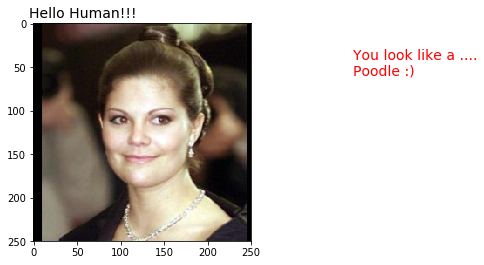

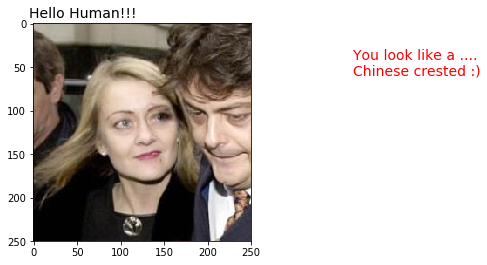

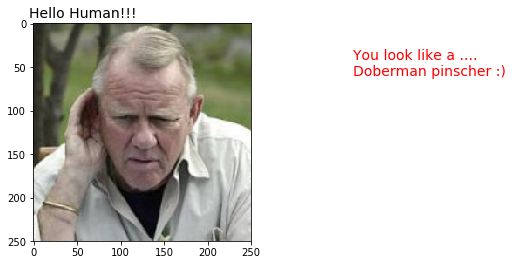

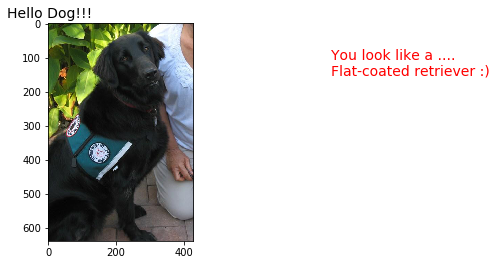

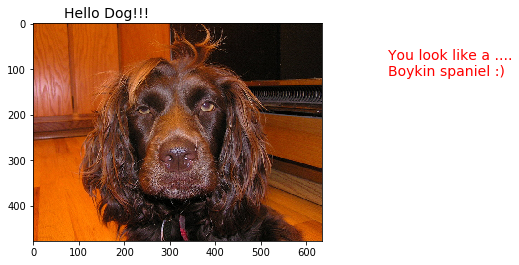

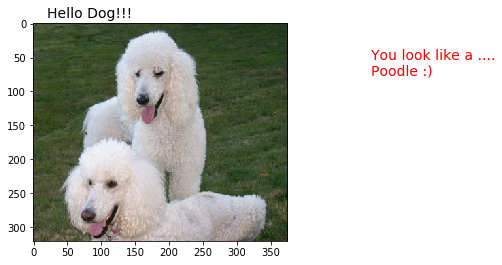

In [26]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
from PIL import Image, ImageDraw, ImageFont
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline

## suggested code, below
for file in np.hstack((random.sample(list(human_files),3), random.sample(list(dog_files),3))):
    kind, breed=run_app(file)
    # load Image
    image = Image.open(file)
    # display the image, along with bounding box
    plt.imshow(image)
    plt.text(0.25, 0.9, 'Hello '+ kind+'!!!', fontsize=14, transform=plt.gcf().transFigure)
    plt.text(1, 0.7, 'You look like a ....\n' + breed+' :)', color='r',fontsize=14, transform=plt.gcf().transFigure)
    plt.show()